In [1]:
#
# Computing diffusion coeff and exponent alpha from individual msd
#

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from os import listdir
import pickle
#from os.path import isfile, join
import matplotlib.pyplot as plt
from scipy.stats import brunnermunzel, linregress
from sklearn.linear_model import LinearRegression

In [142]:
#
# read csv files
#

file_id = 'SK577-6hr-2'

df = pd.read_csv(os.path.join('data', file_id + '.csv'))

dir_save = 'results_' + file_id
dir_save = dir_save.replace('-', '_')
print(dir_save)
os.makedirs(dir_save, exist_ok=True)
#print(df)
#print(df2)
#df['m0'] = df2['m0']
print(df)
n_traj = df['Trajectory'].max()
print('# of trajectories: ', n_traj)

results_SK577_6hr_2
              Trajectory  Frame        x        y  z     m0     m1     m2  \
0          1           1      0  190.270    1.846  0  0.882  1.275  2.066   
1          2           1      1  190.194    2.030  0  1.069  1.412  2.498   
2          3           1      2  189.677    1.840  0  1.158  1.256  2.016   
3          4           1      3  190.172    1.827  0  1.208  1.313  2.156   
4          5           1      4  190.397    1.966  0  1.237  1.316  2.172   
...      ...         ...    ...      ...      ... ..    ...    ...    ...   
27746  27747        1722    100  607.474  848.785  0  1.019  1.554  3.033   
27747  27748        1723     99  295.729  891.577  0  1.012  1.505  2.849   
27748  27749        1723    100  295.854  891.371  0  1.013  1.409  2.510   
27749  27750        1724     99  604.573  918.250  0  0.849  1.457  2.630   
27750  27751        1724    100  604.350  918.474  0  1.112  1.391  2.384   

          m3      m4  NPscore  
0      3.748   7.513   

0  th traj length =  14
1  th traj length =  52
2  th traj length =  16
3  th traj length =  37
4  th traj length =  101
5  th traj length =  2
6  th traj length =  10
7  th traj length =  20
8  th traj length =  13
9  th traj length =  31


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

1.2626328772755753


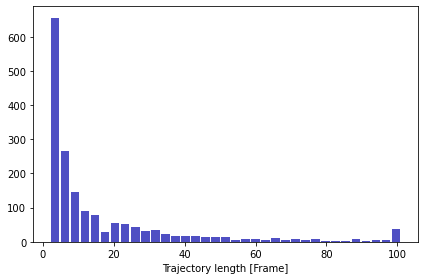

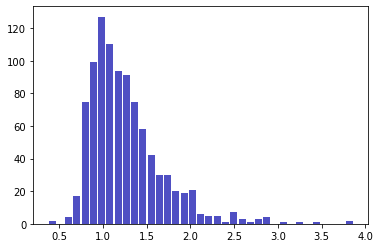

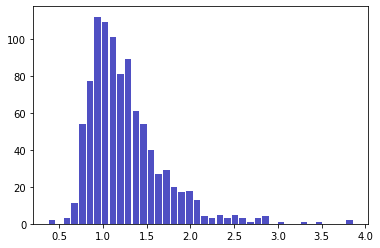

In [145]:
#
# basic characterization
#
lengths = []
m0s = []
for n in range(n_traj):
    df2 = df.loc[df['Trajectory'] == n+1]
    lengths.append(df2.shape[0])
    if n < 10:
        print(n, ' th traj length = ', df2.shape[0])
    if df2.shape[0] > 5:
        m0s.append(df2['m0'].mean())

lengths = np.array(lengths)
m0s = np.array(m0s)
print(np.mean(m0s))

fig, ax = plt.subplots()
n, bins, patches = plt.hist(x=lengths, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.xlabel('Trajectory length [Frame]')
plt.tight_layout()
plt.savefig(os.path.join(dir_save, 'hist_traj_length.eps'))

fig, ax = plt.subplots()
n, bins, patches = plt.hist(x=m0s, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)

fig, ax = plt.subplots()
n, bins, patches = plt.hist(x=m0s[m0s[:] < 20000], bins=40, color='#0504aa', alpha=0.7, rwidth=0.85)

(2,) (2,)
(2, 2)


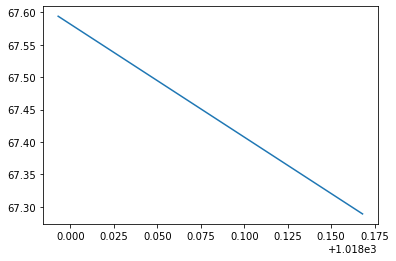

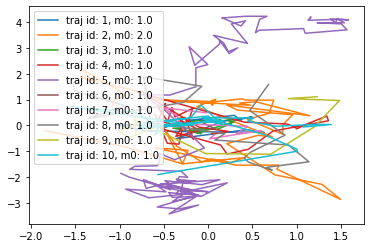

In [146]:
#
# data visualization
#
def select_single_trajectory(df, id_traj = 1, verbosity=1):
    df2 = df.loc[df['Trajectory'] == id_traj]
    #if id_cell == 1: print(df2)# for debug
    coord_x = df2['x'].to_numpy()
    coord_y = df2['y'].to_numpy()
    if verbosity == 1:
        print(coord_x.shape, coord_y.shape)
    return np.stack([coord_x, coord_y], axis=-1)

def compute_total_intensity(df, id_traj = 1):
    df2 = df.loc[df['Trajectory'] == id_traj]
    return df2['m0'].mean()

xy = select_single_trajectory(df, 6)
print(xy.shape)
fig, ax = plt.subplots()
plt.plot(xy[:, 0], xy[:, 1])

fig, ax = plt.subplots()
for n in range(10):
    xy = select_single_trajectory(df, n+1, verbosity=0)
    m0 = compute_total_intensity(df, n+1)
    mean_xy = np.mean(xy, axis=0)
    label = 'traj id: ' + str(n+1) + ', m0: ' + str(np.round(m0))
    plt.plot(xy[:, 0] - mean_xy[0], xy[:, 1] - mean_xy[1], label=label)
plt.legend()

len(msds) =  696


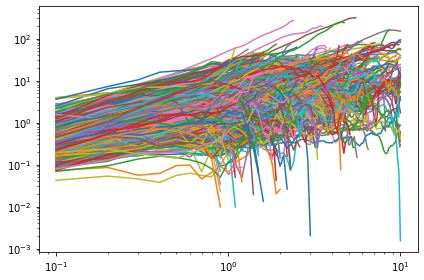

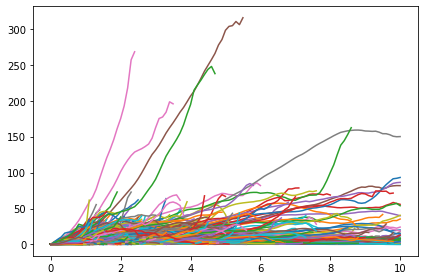

In [147]:
#
# MSD analysis
#
def naive_msd(r):
    shifts = np.arange(len(r))
    msd = np.zeros(shifts.size)

    for i, shift in enumerate(shifts):
        diffs = r[:-shift if shift else None, :] - r[shift:, :]# if shift == 0, r[:None, :] not r[None, :]
        sqdist = np.square(diffs).sum(axis=1)
        msd[i] = sqdist.mean()

    return msd

msds = []
for n in range(n_traj):
    xy = select_single_trajectory(df, n+1, verbosity=0)
    if xy.shape[0] >= 10:
        #disp = (xy - xy[0, :])[1:]
        msd = naive_msd(xy)
        msds.append(msd)
print('len(msds) = ', len(msds))
num_msd = len(msds)

with open(os.path.join(dir_save, 'msds'), 'wb') as fp:
    pickle.dump(msds, fp)

fig, ax = plt.subplots()
for msd in msds:
    ts = 0.1 * np.arange(msd.shape[0])
    plt.loglog(ts[1:], msd[1:])
plt.tight_layout()
plt.savefig(os.path.join(dir_save, 'msds_log.eps'))

fig, ax = plt.subplots()
for msd in msds:
    ts = 0.1 * np.arange(msd.shape[0])
    plt.plot(ts, msd)
plt.tight_layout()
plt.savefig(os.path.join(dir_save, 'msds_normal.eps'))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

0.059032440604705
696


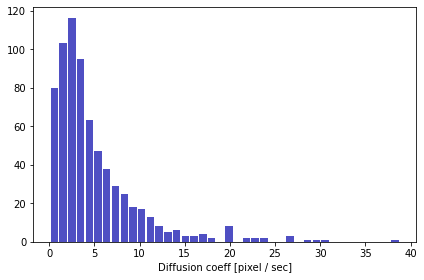

In [148]:
#
# individual diffusion coeffs assuming normal diffusion, following the protocol in (Delarue, Cell, 2018)
#
diffs = []
for msd in msds:
    msd_trunc = msd[:10]
    ts = 0.1 * np.arange(msd_trunc.shape[0])
    reg = LinearRegression(fit_intercept=False).fit(ts.reshape(-1, 1), msd_trunc)
    #print(reg.coef_)
    #res = linregress(ts, msd_trunc) # for comparison
    #print(res.slope)
    diffs.append(reg.coef_[0])

diffs = np.array(diffs)
fig, ax = plt.subplots()
n, bins, patches = plt.hist(x=diffs, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.xlabel('Diffusion coeff [pixel / sec]')
plt.tight_layout()
plt.savefig(os.path.join(dir_save, 'hist_diff_coeff.eps'))

Deff = (diffs/4)*0.26*0.26 # Deff(pixel/sec)からDeff(um^2/sec)へ変換
print(np.median(Deff)) 
print(np.count_nonzero(Deff))

np.savetxt(os.path.join(dir_save, 'Deff.txt'), Deff)

     0         1         2         3         4          5          6    \
0    0.0  0.284874  0.547841  0.610334  0.498289   0.373370   0.667554   
1    0.0  0.428830  0.799984  1.207210  1.718266   2.077627   2.410894   
2    0.0  0.084252  0.119897  0.204735  0.261717   0.277796   0.273427   
3    0.0  0.352892  0.650162  0.837877  0.816115   0.877579   1.065508   
4    0.0  0.159598  0.282071  0.393747  0.577110   0.778943   1.017145   
..   ...       ...       ...       ...       ...        ...        ...   
691  0.0  0.201337  0.464739  0.632337  0.717752   0.649510   0.543650   
692  0.0  2.180546  4.736663  6.287579  8.842552  11.390954  15.073157   
693  0.0  0.214225  0.542295  0.972798  1.493957   1.512768   1.521876   
694  0.0  0.327298  0.914784  1.691530  2.331818   2.549005   2.399897   
695  0.0  0.448318  1.038298  2.191608  3.710793   5.447077   7.293335   

           7          8          9    ...        91         92         93   \
0     0.847118   0.765694   0.725

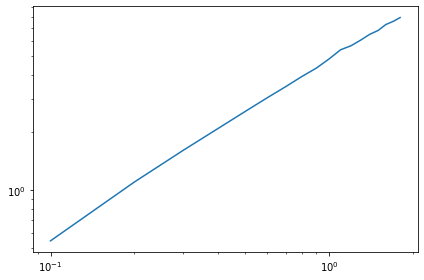

In [149]:
#
# Ensemble-averaged MSD
#
#for msd in msds:
#    print(msd.shape)
df_msds = pd.DataFrame(msds)
print(df_msds)
ens_msd = df_msds.mean(0, skipna=True).values
print(ens_msd)

fig, ax = plt.subplots()
ts = 0.1 * np.arange(ens_msd.shape[0])
plt.loglog(ts[1:19], ens_msd[1:19])
plt.tight_layout()
plt.savefig(os.path.join(dir_save, 'ens_msd_log.eps'))

res = linregress(np.log(ts[1:11]), np.log(ens_msd[1:11])) # for comparison
print(res, res.slope)

np.savetxt(os.path.join(dir_save, 'ens_msd.txt'), ens_msd)